In [23]:
# data understanding
head(mtcars)
# get dataset columns for prediction
input = mtcars[,c('mpg','disp','hp','wt')]
head(input)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


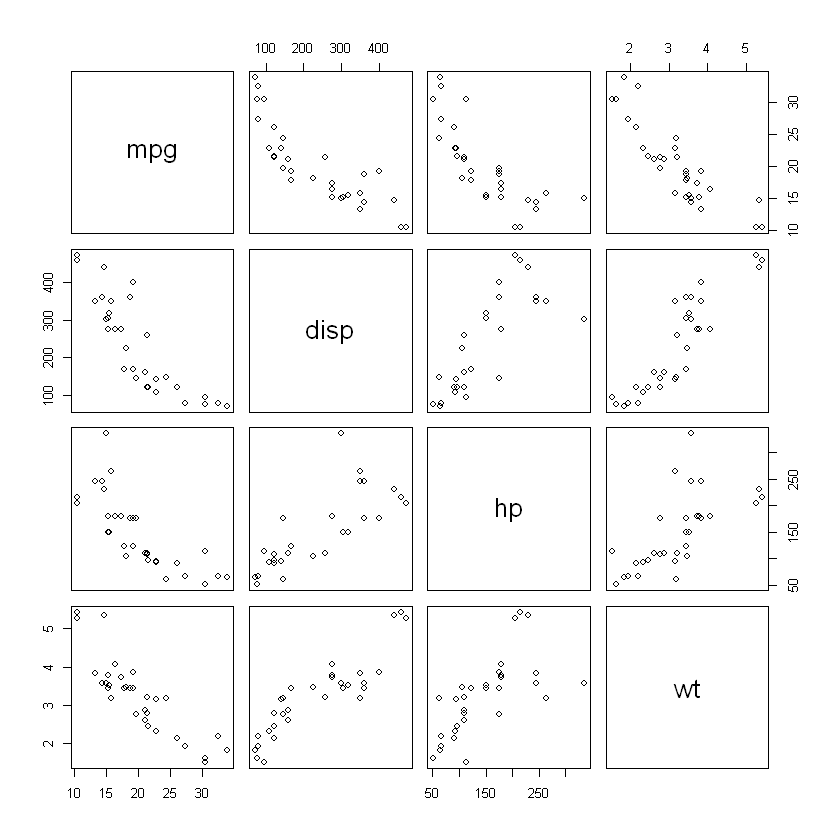

In [24]:
# visualization 
pairs(~mpg+disp+hp+wt, data=input)

In [4]:
library('ggplot2')

In [5]:
plot = ggplot(data = iris, aes(x=Petal.Width, y=Petal.Length))+ 
        geom_point() + geom_smooth(method='lm') + 
        theme_bw(base_size=14)

`geom_smooth()` using formula 'y ~ x'



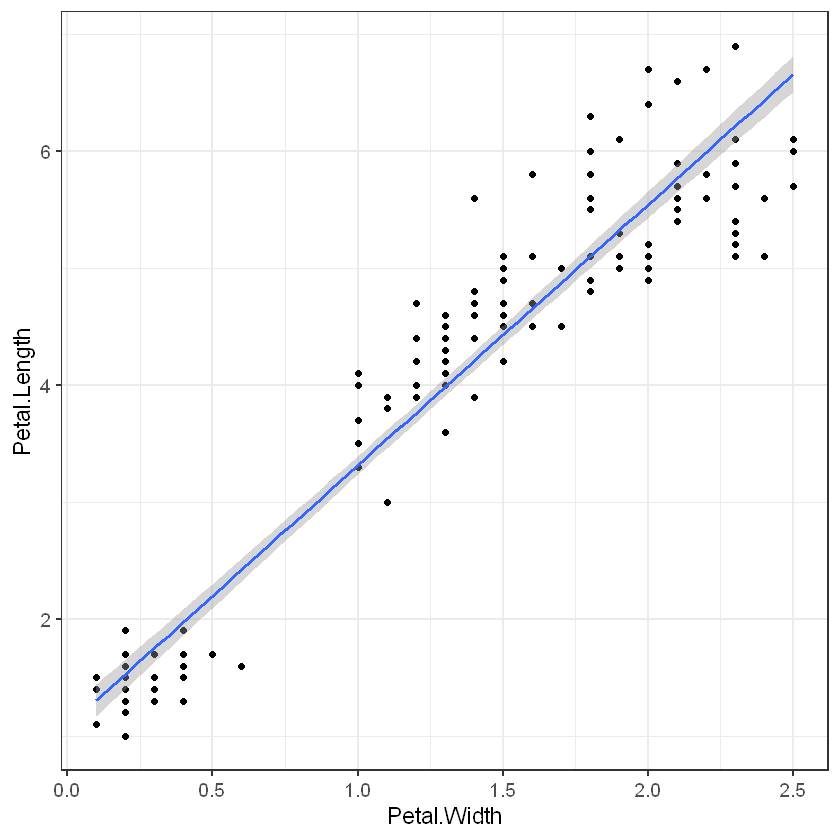

In [6]:
plot

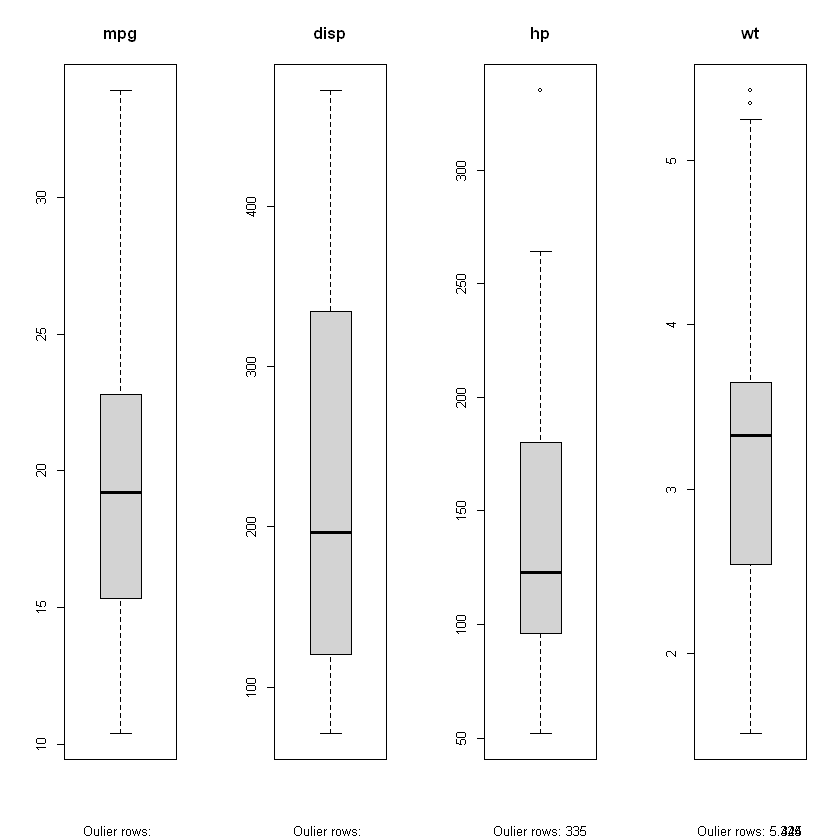

In [28]:
# boxplot to check for outliers
par(mfrow=c(1,4)) # divide graph area in 4 columns 
boxplot(input$mpg, main='mpg',
       sub=paste('Oulier rows:', boxplot.stats(input$mpg)$out)) # box plot for 'mpg'
boxplot(input$disp, main='disp',
       sub=paste('Oulier rows:', boxplot.stats(input$disp)$out)) # box plot for 'disp'
boxplot(input$hp, main='hp',
       sub=paste('Oulier rows:', boxplot.stats(input$hp)$out)) # box plot for 'hp'
boxplot(input$wt, main='wt',
       sub=paste('Oulier rows:', boxplot.stats(input$wt)$out)) # box plot for 'wt'

In [32]:
hp_outliers = boxplot.stats(input$hp)$out

wt_outliers = c(boxplot.stats(input$wt)$out)

# drop rows have outliers
print(paste('Before drop:', nrow(input)))
input = input[input$hp != hp_outliers[1],]
input = input[input$wt != wt_outliers[1],]
input = input[input$wt != wt_outliers[2],]
print(paste('After drop:', nrow(input)))

[1] "Before drop: 32"
[1] "After drop: 29"


In [33]:
# calculate correlation between mpg and disp, hp, wt
print('correlation between mpg and disp, hp, wt:')
print(cor(input$mpg, input$disp))
print(cor(input$mpg, input$hp))
print(cor(input$mpg, input$wt))

[1] "correlation between mpg and disp, hp, wt:"
[1] -0.8290389
[1] -0.7997213
[1] -0.8830596


In [34]:
# Create the training (development) and test (validation) data samples from original data
set.seed(42) # setting seed to reproduce results of random sampling
trainingRowIndex = sample(1:nrow(input), 0.8*nrow(input)) # row indices for training data
print('Selected training row indexes')
print(trainingRowIndex)
trainingData = input[trainingRowIndex,] # training data
testData = input[-trainingRowIndex,] # test data
print('Rows of training data and test data:')
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes"
 [1] 17  5  1 25 10  4 18 29 15  7 24 28 14 19 26  2  3  9 12 16 23 20 11
[1] "Rows of training data and test data:"
[1] 23
[1] 6


In [38]:
# Develop the model on the training data and use it to predict the Length on test data
lmMod = lm(mpg~disp+hp+wt, data=trainingData) # build the model
cPred = predict(lmMod, testData) # predict length

# mean square error according to model
mse = mean(lmMod$residuals^2)
print(paste('mse:', mse))

# mean square error of testData
mse_test = mean((testData$mpg-cPred)^2)
print(paste('mse in test:', mse_test))

[1] "mse: 4.9035236695173"
[1] "mse in test: 4.49282285889091"


In [41]:
# Review diagnostic measures
print(summary(lmMod)) # model summary


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5460 -1.2036 -0.3469  1.2579  5.1846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.14944    2.34868  17.520 3.48e-13 ***
disp         0.01320    0.01101   1.199 0.245304    
hp          -0.05281    0.02003  -2.637 0.016260 *  
wt          -5.22157    1.22671  -4.257 0.000427 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.436 on 19 degrees of freedom
Multiple R-squared:  0.859,	Adjusted R-squared:  0.8368 
F-statistic:  38.6 on 3 and 19 DF,  p-value: 2.783e-08



In [44]:
# Get the Intercept and coefficients as vector elements
cat('#### The coefficient values ###','\n')

b = coef(lmMod)[1]
print(b)

mdisp = coef(lmMod)[2]
mhp = coef(lmMod)[3]
mwt = coef(lmMod)[4]

print(mdisp)
print(mhp)
print(mwt)

#### The coefficient values ### 
(Intercept) 
   41.14944 
    disp 
0.013202 
         hp 
-0.05281201 
       wt 
-5.221568 


In [45]:
# New predictions
# disp = 221, hp = 102, wt = 2.91
x1 = 221
x2 = 102
x3 = 2.91
y = (mdisp*x1 + mhp*x2 + mwt*x3 + b)
print('Solution 1 - results:')
print(y)
# Solution 2
y1 = predict(lmMod, data.frame(disp = x1, hp = x2, wt = x3))
print('Solution 2 - results:')
print(y1)

[1] "Solution 1 - results:"
   disp 
23.4855 
[1] "Solution 2 - results:"
      1 
23.4855 


In [46]:
install.packages('BMA')

Installing package into 'C:/Users/hv/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'BMA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hv\AppData\Local\Temp\RtmpSiPX43\downloaded_packages
